# Testing Agent on new emails

## Launch Notebooks

# LangGraph Agent in Memory
Defining the agent's graph (state, nodes, edges) and run it in memory.

## Env & Variables
Running package install and defining global variables from separate Notebooks.

# Environment Set up
Installing packages and configuring environment.

## Packages Install

Python 3.12.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-api-core 2.20.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0.dev0,>=3.19.5, but you have protobuf 6.33.5 which is incompatible.
grpcio-status 1.67.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 6.33.5 which is incompatible.
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-health-checking 1.76.0 requires protobuf<7.0.0,>=6.31.1, but you have protobuf 5.29.6 which is incompatible.
grpcio-tools 1.75.1 requires protobuf<7.0.0,>=6.31.1, but you have protobuf 5.29.6 which is incompatible.
langgraph-a

## Configure Logging

# Global Variables definition
Creating global variables.

# Prompts Definition
Defining all prompts for the nodes and tools used by the agent.

## Assistant Prompt
Prompt used by the Assistant (the "reasoning" node we'll define in the ReAct agent architecture).

## Classification Prompt
Prompt used by the classification tool.

## Schemas
Defining the desired agent's State and output schemas.

## LLMs
Defining the base LLM to be used by the agent nodes.

PyTorch was not found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
Unexpected internal error when monkey patching `PreTrainedModel.from_pretrained`: 
PreTrainedModel requires the PyTorch library but it was not found in your environment. Check out the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.

Unexpected internal error when monkey patching `Trainer.train`: 
Trainer requires the PyTorch library but it was not found in your environment. Check out the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.



## Tools
Specify all tools the agent can use to retrieve information and classify emails.

/local_disk0/.ephemeral_nfs/envs/pythonEnv-195b6a7d-4622-4d43-ac1d-bfc5647c08f8/lib/python3.12/site-packages/databricks/connect/session.py:476: UserWarning: Ignoring the default notebook Spark session and creating a new Spark Connect session. To use the default notebook Spark session, use DatabricksSession.builder.getOrCreate() with no additional parameters.
  warnings.warn(new_notebook_session_msg)


## Nodes
Creating the reasoning node (assistant) and the respond node.

## Graph

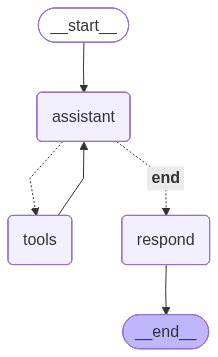

## Testing
Run a test case with Notebook context

'We received from: sofia.rossi@example.com the following email: Understood, thank you.'

================================ Human Message =================================

We received from: sofia.rossi@example.com the following email: Understood, thank you.
================================== Ai Message ==================================

I'll help you classify this email. Let me first retrieve the relevant context information for the customer and then classify the email.
Tool Calls:
  users__gabriele_albini__classificator_agent_customer_retriever (toolu_bdrk_01Nhqm4Ho1cPWvv2Unq7qP7Z)
 Call ID: toolu_bdrk_01Nhqm4Ho1cPWvv2Unq7qP7Z
  Args:
    customer_email: sofia.rossi@example.com
================================= Tool Message =================================
Name: users__gabriele_albini__classificator_agent_customer_retriever

{"format": "SCALAR", "value": "Row(Customer_Id=3, Name='Sofia', Surname='Rossi', Email='sofia.rossi@example.com', Address='Via Milano 11, 20126 Milano, Italy')"}
================================== Ai Message ==================================

Now le

Trace(trace_id=tr-7ab0f0b9e3d2993ba08f55dfd739099e)

customer_details
"List(3, Sofia, Rossi, sofia.rossi@example.com, Via Milano 11, 20126 Milano, Italy)"


order_details
"List(ID-45892183, 2025-11-11, [""Mouse Pad"", ""Ergonomic Wrist Rest""], 42.3, 3)"


ticket_details
"List(3, TKT-004, 2025-11-28 10:48:57, Dear team, I returned an item last week but haven’t received my refund confirmation yet. When should I expect it?, Returns & Refunds)"


In [0]:
%run ./step3_Agent_Graph_inMemory

In [0]:
#%run ./step0_Environment

In [0]:
#%run ./step0_Variables

## Set up ML flow Experiment

In [0]:
experiment_name_ = "Email_Classificator_Agent_202602"

In [0]:
import mlflow
experiment_path = experiment_dir_ + experiment_name_
experiment = mlflow.get_experiment_by_name(experiment_path)

if experiment is not None:
    experiment_id = experiment.experiment_id
else:
    experiment_id = mlflow.create_experiment(name=experiment_path)

## Run Tests

In [0]:
## Save test cases
spark.sql("USE CATALOG "+catalog_)
spark.sql("USE SCHEMA "+schema_)
df_test_emails = spark.table("classificator_agent_emails")

In [0]:
## Create helper function
from pyspark.sql.functions import *
from langchain_core.messages import HumanMessage

# Extract test case from the dataframe with examples
def launch_agent(id_, run_name_ = "Test new emails 27 Jan 2026"):
  """ Launch agent on the email associated to the record id_"""

  ## Prepare request
  test_record = df_test_emails.filter(col("Email_Id") == id_).first()
  message_ = f"We received from: {test_record.Email_Sender} the following email: {test_record.Email_Body}"
  print("\n\n***************************************\n")
  print(":: Testing agent on record %d:\n" % id_)
  display(message_)

  ## Invoke the Agent
  config_ = {"configurable": {"thread_id": id_}} # Not required if we're not using memory
  mlflow.langchain.autolog()
  with mlflow.start_run(experiment_id=experiment_id, run_name=run_name_):
    request = [
      HumanMessage(content = message_)
    ]
    messages = react_email_classifier.invoke({"messages": request}, config_)

    for m in messages['messages']:
        m.pretty_print()

    return messages

In [0]:
## Launch Tests
test_email_ids = [row.Email_Id for row in df_test_emails.select("Email_Id").collect()]
results_ = []

for id_ in test_email_ids:
  result = launch_agent(id_)
  results_.append(result)



***************************************

:: Testing agent on record 1:



'We received from: jonas.mueller@example.com the following email: Hi, I received my order today, but one of the items is missing. Could you please check if it will be sent separately?'

================================ Human Message =================================

We received from: jonas.mueller@example.com the following email: Hi, I received my order today, but one of the items is missing. Could you please check if it will be sent separately?
================================== Ai Message ==================================

I'll help you classify this email and suggest next steps. Let me first retrieve the relevant customer information and context.
Tool Calls:
  users__gabriele_albini__classificator_agent_customer_retriever (toolu_bdrk_018eRJAx1qwN3aNW8W91S3zg)
 Call ID: toolu_bdrk_018eRJAx1qwN3aNW8W91S3zg
  Args:
    customer_email: jonas.mueller@example.com
================================= Tool Message =================================
Name: users__gabriele_albini__classificator_agent_customer_retriever

{"format": "SCALAR", "value": "Row(Customer_Id=2, Name='Jonas', Surname='M\u00fcller', Email='jonas.mueller@example.com', Address='221B Baker Street, NW1 6XE Lo

'We received from: carla.lindberg@example.com the following email: Hello, I’d like to return the document tray I bought. Could you let me know the return steps?'

================================ Human Message =================================

We received from: carla.lindberg@example.com the following email: Hello, I’d like to return the document tray I bought. Could you let me know the return steps?
================================== Ai Message ==================================

I'll help you classify this customer email and suggest next steps. Let me first retrieve the relevant customer information and context.
Tool Calls:
  users__gabriele_albini__classificator_agent_customer_retriever (toolu_bdrk_01U2AtwD1JjZdm8XtX4rrVAM)
 Call ID: toolu_bdrk_01U2AtwD1JjZdm8XtX4rrVAM
  Args:
    customer_email: carla.lindberg@example.com
================================= Tool Message =================================
Name: users__gabriele_albini__classificator_agent_customer_retriever

{"format": "SCALAR", "value": "Row(Customer_Id=9, Name='Carla', Surname='Lindberg', Email='carla.lindberg@example.com', Address='Sveav\u00e4gen 15, 111 57 Stockholm, Sweden'

'We received from: markus.weber@example.com the following email: Good afternoon, I noticed an unauthorized charge on my credit card from your store. Can you please verify what this order refers to?'

================================ Human Message =================================

We received from: markus.weber@example.com the following email: Good afternoon, I noticed an unauthorized charge on my credit card from your store. Can you please verify what this order refers to?
================================== Ai Message ==================================

I'll help you classify this email and retrieve the relevant context information. Let me start by looking up the customer information and then gather additional context.
Tool Calls:
  users__gabriele_albini__classificator_agent_customer_retriever (toolu_bdrk_01FE1R3Cbbw7dxLk2E57QLbF)
 Call ID: toolu_bdrk_01FE1R3Cbbw7dxLk2E57QLbF
  Args:
    customer_email: markus.weber@example.com
================================= Tool Message =================================
Name: users__gabriele_albini__classificator_agent_customer_retriever

{"format": "SCALAR", "value": "Row(Customer_Id=18, Name='Markus', Surname='Weber', Email='markus.weber@ex

'We received from: sofia.petrova@example.com the following email: Dear team, could you please delete my account and all personal information as per GDPR regulations?'

================================ Human Message =================================

We received from: sofia.petrova@example.com the following email: Dear team, could you please delete my account and all personal information as per GDPR regulations?
================================== Ai Message ==================================

I'll help you classify this email and suggest next steps. Let me first retrieve the relevant customer information.
Tool Calls:
  users__gabriele_albini__classificator_agent_customer_retriever (toolu_bdrk_012d5Z38WWRGamHHvdMK6ZfP)
 Call ID: toolu_bdrk_012d5Z38WWRGamHHvdMK6ZfP
  Args:
    customer_email: sofia.petrova@example.com
================================= Tool Message =================================
Name: users__gabriele_albini__classificator_agent_customer_retriever

{"format": "SCALAR", "value": "Row(Customer_Id=19, Name='Sofia', Surname='Petrova', Email='sofia.petrova@example.com', Address='ul. Vitosha 67, 1000 Sofia, Bulgaria')"}
=====================

'We received from: david.nguyen@example.com the following email: Hi there, when will the blue version of the wireless headphones be restocked? I’ve been waiting for weeks!'

================================ Human Message =================================

We received from: david.nguyen@example.com the following email: Hi there, when will the blue version of the wireless headphones be restocked? I’ve been waiting for weeks!
================================== Ai Message ==================================

I'll help you classify this customer email. Let me first retrieve the customer information and then gather relevant context.
Tool Calls:
  users__gabriele_albini__classificator_agent_customer_retriever (toolu_bdrk_016GrRYe5sEfeSXtK5SCHHH5)
 Call ID: toolu_bdrk_016GrRYe5sEfeSXtK5SCHHH5
  Args:
    customer_email: david.nguyen@example.com
================================= Tool Message =================================
Name: users__gabriele_albini__classificator_agent_customer_retriever

{"format": "SCALAR", "value": "Row(Customer_Id=6, Name='David', Surname='Nguyen', Email='david.nguyen@example.com', Address='Damrak 45, 1012 LL Amsterdam, Netherlands')"}
====

'We received from: newsletter@shopupdates.com the following email: Exciting new deals for this weekend! Get up to 50% off on electronics and home decor. Don’t miss out!'

================================ Human Message =================================

We received from: newsletter@shopupdates.com the following email: Exciting new deals for this weekend! Get up to 50% off on electronics and home decor. Don’t miss out!
================================== Ai Message ==================================

I have the sender email address (newsletter@shopupdates.com) and the email body. Let me retrieve the relevant context information and classify this email.
Tool Calls:
  users__gabriele_albini__classificator_agent_customer_retriever (toolu_bdrk_01S5GHwaMWYmiTtbUPysA9Nh)
 Call ID: toolu_bdrk_01S5GHwaMWYmiTtbUPysA9Nh
  Args:
    customer_email: newsletter@shopupdates.com
================================= Tool Message =================================
Name: users__gabriele_albini__classificator_agent_customer_retriever

{"format": "SCALAR", "value": "None"}
================================== Ai Message ==================================

Since no customer was foun

'We received from: sofia.rossi@example.com the following email: Understood, thank you.'

================================ Human Message =================================

We received from: sofia.rossi@example.com the following email: Understood, thank you.
================================== Ai Message ==================================

I'll help you classify this email. Let me start by retrieving the customer information and then gather the relevant context.
Tool Calls:
  users__gabriele_albini__classificator_agent_customer_retriever (toolu_bdrk_01W4tr3p4VcPCcejrdcuqS4P)
 Call ID: toolu_bdrk_01W4tr3p4VcPCcejrdcuqS4P
  Args:
    customer_email: sofia.rossi@example.com
================================= Tool Message =================================
Name: users__gabriele_albini__classificator_agent_customer_retriever

{"format": "SCALAR", "value": "Row(Customer_Id=3, Name='Sofia', Surname='Rossi', Email='sofia.rossi@example.com', Address='Via Milano 11, 20126 Milano, Italy')"}
================================== Ai Message ==================================

Now let me retrie

[Trace(trace_id=tr-80f91c3e226a42d6a7e261899f9d4f8a), Trace(trace_id=tr-e0bc01028adaed9bd265de7283fc9f90), Trace(trace_id=tr-42aa413364df3ac748dfca3432288b90), Trace(trace_id=tr-206f8ec8b4c22e8c5faddc1151e02e40), Trace(trace_id=tr-a03038d1446593514e418d6b1dfd1ce7), Trace(trace_id=tr-49fe0ccf4f81286edd5b7b60df6dfbaf), Trace(trace_id=tr-7e65142d7176587edace1cf0c922c7d5)]

In [0]:
## Progragmatically extract Labels
final_labels_ = []
for res_ in results_:
  final_label = res_['final_output'].Label
  final_labels_.append(final_label)
  print(final_label)

Order Issues
Returns & Refunds
Payment & Billing
Account & Data Requests
Product Information
Spam
Returns & Refunds


### Verify conext info

In [0]:
%sql
-- Available Context: Customer Details
SELECT classificator_agent_customer_retriever('david.nguyen@example.com') AS customer_details;

customer_details
"List(6, David, Nguyen, david.nguyen@example.com, Damrak 45, 1012 LL Amsterdam, Netherlands)"


In [0]:
%sql
-- Available Context: Order Details
SELECT classificator_agent_order_retriever(6) AS order_details;

order_details
"List(ID-45892186, 2025-11-20, [""Network Switch 8-port"", ""Ethernet Cables (5x)""], 224.8, 6)"


In [0]:
%sql
-- Available Context: Ticket Details
SELECT classificator_agent_ticket_retriever(6) AS ticket_details;

ticket_details
null
